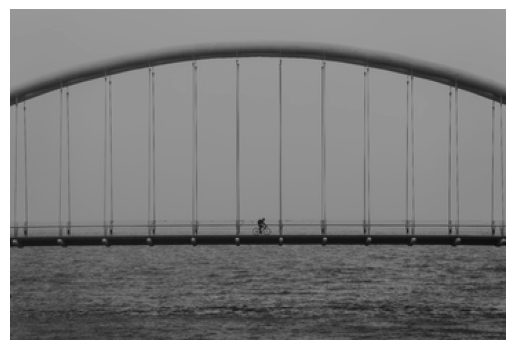

In [1]:
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
path = os.path.join('DATA/PICS', 'most.pgm')
M = imread(path).astype('float32')
plt.axis('off')
plt.imshow(M, cmap='gray', vmin=0, vmax=400)

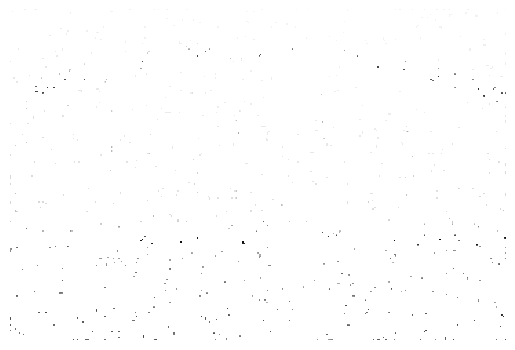

In [2]:
from utils.data_generation import remove_pixels_uniformly

M_incomplete = remove_pixels_uniformly(M, missing_part=0.7)
plt.axis('off')
plt.imshow(M_incomplete, cmap='gray')

In [3]:
%%time
from src.css_matrix_completion.mc import nn_complete

M_filled = nn_complete(M_incomplete)
plt.axis('off')
plt.imshow(M_filled, cmap='gray',  vmin=0, vmax=400)

ModuleNotFoundError: No module named '_scs_gpu'

In [6]:
from src.css_matrix_completion.cssmc import CSSMC
from src.css_matrix_completion.transform import cx
from src.css_matrix_completion.css import uniform

n_selected_cols = int(0.7 * M.shape[1])
solver = CSSMC(col_number=n_selected_cols, transform=cx, col_select=uniform, fill_method='zero')
M_filled, cols_idx = solver.fit_transform(M_incomplete)

/home/tosia/NASK/css-matrix-completion/src/css_matrix_completion/transform.py:84: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Y[i, :] = np.linalg.lstsq(siX, sia)[0]


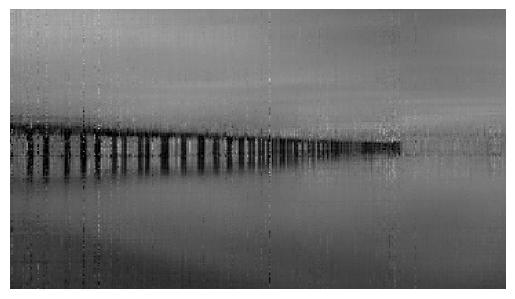

In [65]:
plt.axis('off')
plt.imshow(M_filled, cmap='gray')
plt.imshow(M_filled, cmap='gray', vmin=0, vmax=400)

In [4]:
import numpy as np
np.linalg.norm(M - M_filled) / np.linalg.norm(M)

0.04741312325997758

In [3]:
M.shape

(240, 360)

In [5]:
20 * np.log10(np.linalg.norm(M)/np.linalg.norm(M_filled - M))

26.482028706362037

In [3]:
from src.css_matrix_completion.mc import grid_svt

M_filled = grid_svt(M_incomplete)

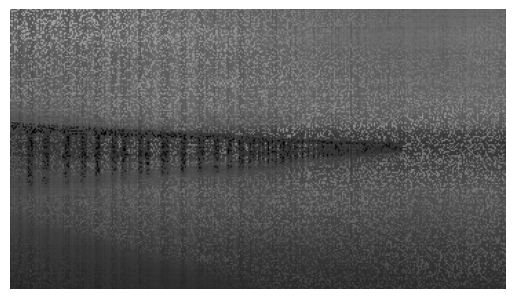

In [4]:
plt.axis('off')
plt.imshow(M_filled, cmap='gray')
plt.imshow(M_filled, cmap='gray', vmin=0, vmax=400)

In [5]:
import numpy as np
np.linalg.norm(M - M_filled) / np.linalg.norm(M)

0.2635786939332369